# Import the libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
import numpy as np
import seaborn as sns

# Load the dataset

In [2]:
# Load the dataset
dtitanic = pd.read_csv('titanic_dataset.csv')
titanic = pd.read_csv('titanic_dataset.csv')

In [3]:
# Check for missing values
missing_values = titanic.isnull().sum()
# Display columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]
print(columns_with_missing_values)

Age         177
Cabin       687
Embarked      2
dtype: int64


# Fill the missing data

In [4]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Cabin'].fillna('Unknown', inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

In [5]:
# Check for missing values
missing_values = titanic.isnull().sum()
# Display columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]
print(columns_with_missing_values)

Series([], dtype: int64)


# Remove Duplicats

In [6]:
titanic.drop_duplicates(inplace=True);

In [7]:
print(titanic.shape);
print(dtitanic.shape);

(891, 12)
(891, 12)


# Correct inconsistencies

In [8]:
titanic['Ticket'] = titanic['Ticket'].str.replace('[^a-zA-Z0-9]', '', regex=True)
titanic['Fare'] = titanic['Fare'].round(2)

# Detect outliers using IQR and Z-Score

In [9]:
Q1 = titanic['Fare'].quantile(0.25)
Q3 = titanic['Fare'].quantile(0.75)
IQR = Q3 - Q1
outliers = titanic[(titanic['Fare'] < (Q1 - 1.5 * IQR)) | (titanic['Fare'] > (Q3 + 1.5 * IQR))]
print(outliers)

     PassengerId  Survived  Pclass   
1              2         1       1  \
27            28         0       1   
31            32         1       1   
34            35         0       1   
52            53         1       1   
..           ...       ...     ...   
846          847         0       3   
849          850         1       1   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                                  Name     Sex   Age  SibSp   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1  \
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female  28.0      1   
34                             Meyer, Mr. Edgar Joseph    male  28.0      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
..                                                 ...     ...   ... 

## IQR

In [10]:
# Capping outliers in 'Fare'
titanic.loc[titanic['Fare'] > (Q3 + 1.5 * IQR), 'Fare'] = Q3 + 1.5 * IQR

## Z-Score

In [11]:
# Outlier Detection and Treatment for 'Fare' using Z-score
z_scores = stats.zscore(titanic['Fare'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)  # Keep only rows where Z-score is less than 3
print(filtered_entries)
titanic = titanic[filtered_entries]
print(titanic)

0      True
1      True
2      True
3      True
4      True
       ... 
886    True
887    True
888    True
889    True
890    True
Name: Fare, Length: 891, dtype: bool
     PassengerId  Survived  Pclass   
0              1         0       3  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp   
0                              Braund, Mr. Owen Harris    male  22.0      1  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  fe

# Data Transformation

In [12]:
# Standardization of 'Age' and 'Fare' using StandardScaler
scaler = StandardScaler()
titanic[['Age']] = scaler.fit_transform(titanic[['Age']])

In [13]:
# Normalization of 'SibSp' and 'Parch' using MinMaxScaler
min_max_scaler = MinMaxScaler()
titanic[[ 'Fare']] = min_max_scaler.fit_transform(titanic[[ 'Fare']])
titanic[[ 'SibSp']] = min_max_scaler.fit_transform(titanic[[ 'SibSp']])
titanic[[ 'Parch']] = min_max_scaler.fit_transform(titanic[[ 'Parch']])

In [14]:
print(titanic[['Fare', 'SibSp', 'Parch']])

         Fare  SibSp     Parch
0    0.110459  0.125  0.000000
1    1.000000  0.125  0.000000
2    0.120667  0.000  0.000000
3    0.809020  0.125  0.000000
4    0.122648  0.000  0.000000
..        ...    ...       ...
886  0.198065  0.000  0.000000
887  0.457073  0.000  0.000000
888  0.357279  0.125  0.333333
889  0.457073  0.000  0.000000
890  0.118077  0.000  0.000000

[891 rows x 3 columns]


# Plot the data before and after cleaning

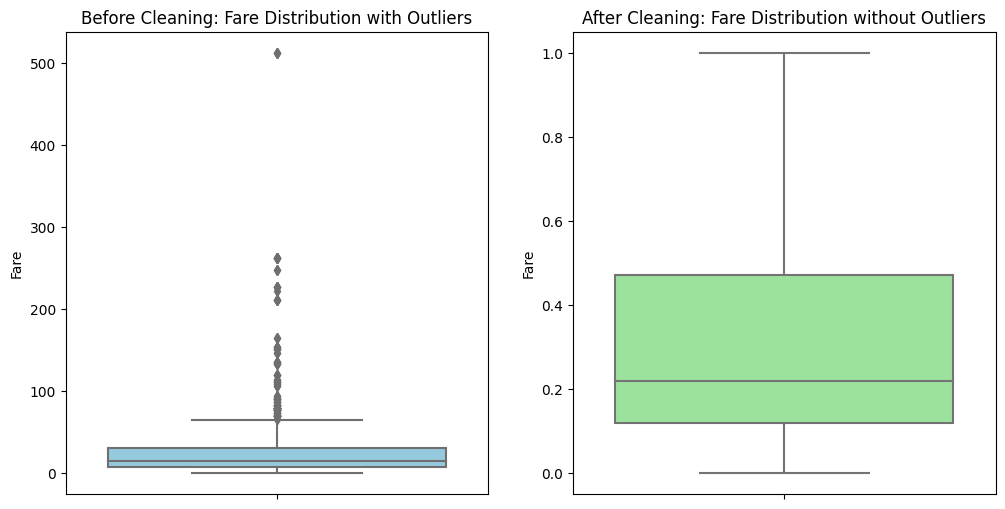

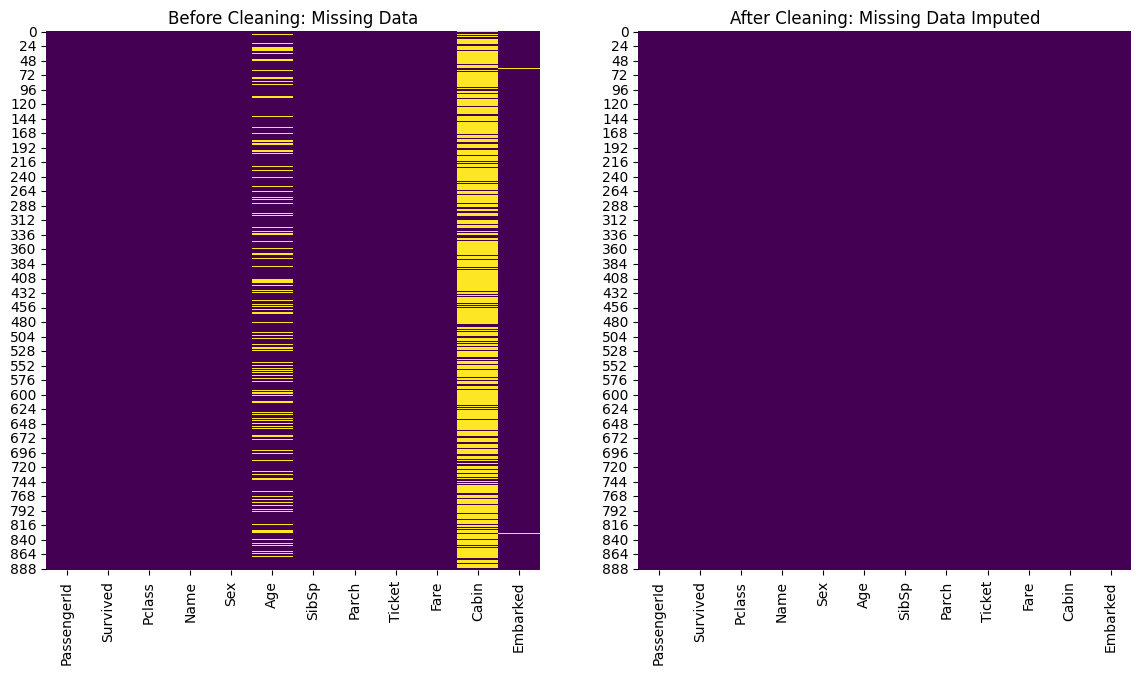

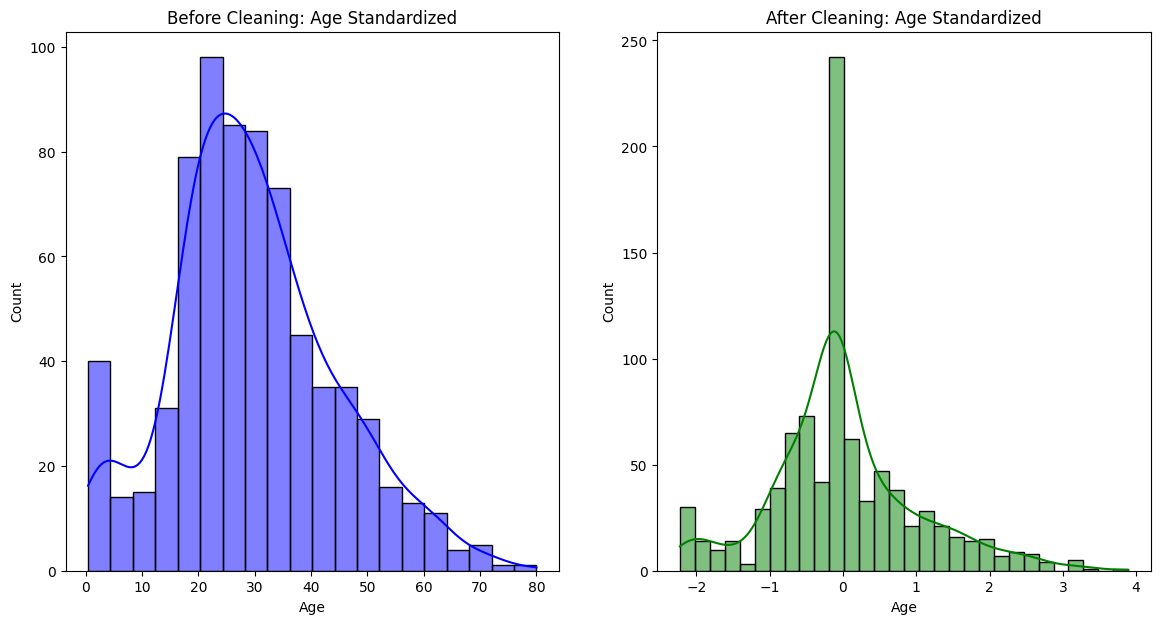

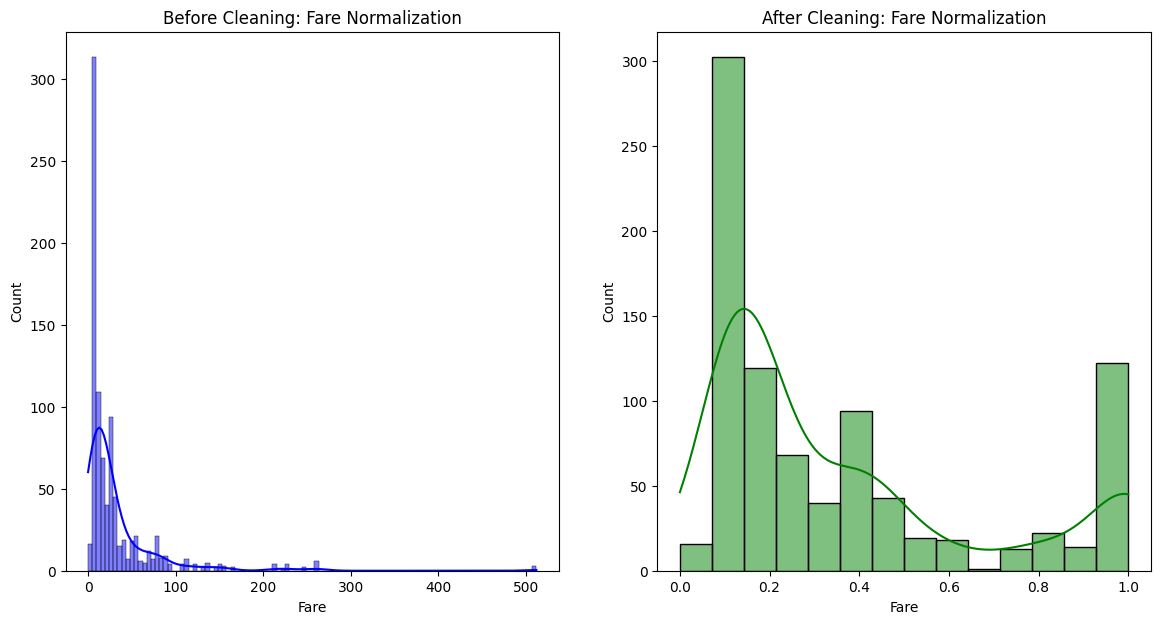

,Original Ticket,Corrected Ticket
0,A/5 21171,A521171
1,PC 17599,PC17599
2,STON/O2. 3101282,STONO23101282
3,113803,113803
4,373450,373450
5,330877,330877
6,17463,17463
7,349909,349909
8,347742,347742
9,237736,237736


In [15]:
# Visualizing 'Fare' distribution before and after outlier capping
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=dtitanic['Fare'], color='skyblue')
plt.title('Before Cleaning: Fare Distribution with Outliers')

# Assuming 'cleaned_titanic' is your DataFrame after cleaning
plt.subplot(1, 2, 2)
sns.boxplot(y=titanic['Fare'], color='lightgreen')
plt.title('After Cleaning: Fare Distribution without Outliers')
plt.show()


# Assuming 'titanic' is your original dataset with missing values
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.heatmap(dtitanic.isnull(), cbar=False, cmap='viridis')
plt.title('Before Cleaning: Missing Data')

# Assuming 'cleaned_titanic' is after imputation
plt.subplot(1, 2, 2)
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title('After Cleaning: Missing Data Imputed')
plt.show()
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.histplot(dtitanic['Age'].dropna(), kde=True, color='blue')
plt.title('Before Cleaning: Age Standardized')

plt.subplot(1, 2, 2)
sns.histplot(titanic['Age'], kde=True, color='green')
plt.title('After Cleaning: Age Standardized')
plt.show()

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.histplot(dtitanic['Fare'].dropna(), kde=True, color='blue')
plt.title('Before Cleaning: Fare Normalization')

plt.subplot(1, 2, 2)
sns.histplot(titanic['Fare'], kde=True, color='green')
plt.title('After Cleaning: Fare Normalization')
plt.show()


# Assuming dtitanic is the original dataset and titanic is the dataset after correcting inconsistencies
sample_tickets_original = dtitanic['Ticket'].head(50)  # Sample of original ticket entries
sample_tickets_corrected = titanic['Ticket'].head(50)  # Sample of corrected ticket entries

comparison_df = pd.DataFrame({
    'Original Ticket': sample_tickets_original,
    'Corrected Ticket': sample_tickets_corrected
})

comparison_df

# Interview Questions

**Scenario**: You are working on a dataset that includes patient records in a healthcare database. After initial analysis, you identify that 15% of the patient age data is missing. The dataset is fairly large, with over 100,000 records. The age data is important for your analysis to track disease prevalence across age groups.

**Question 1**: Describe how you would handle these missing values. Discuss the techniques you would consider and explain your choice. How would your approach change if missing values were identified in a more critical feature, such as diagnosis information?

**Answer Q1**:

There are many techniques that we can use to handle the missing data:
1.   Mean/Median Imputation: Replace the missing data with the mean or median of the avaliable data, Median is better for the age data because it's not affected by outliers.
2.   Mode Imputation: Replace the mssing data with the Mode of the avilable data, this could be a good choice if the patients are usually from the same age.
3.   KNN Imputation: Replace the missing data with the value of the nearest neighbor in the dataset, this method is good for treating the age because it will compare the similar patients.
4.  Deletion: to delete the records where the age is missing, this will cause us to lose 15% of the data which is a large percentage and will affect the performance of the model.

My choice would be the KNN because it's going to fill the missing values with value from similar patients

If the missing data is more critical such as diagnosis information, I could choose the deletion or more advance techniques to make sure to maintain the data integrity





---



**Scenario**: You are tasked with cleaning a financial dataset used for forecasting stock prices. The dataset contains some apparent outliers in the volume of trades, which could potentially skew the predictive models. Preliminary analysis shows that these outliers represent days with significant market news.

**Question 2**: What methods would you use to detect these outliers, and how would you decide whether to remove or adjust these data points in the dataset? Outline the potential impacts of your decision on the forecast model's performance.

**Answer Q2:**

We can use the below to detect the outliers:
- **Z-Score**: Calculate the Z-score ((Mean - value) / Standard deviation) for trade volumes. Values with a Z-score greater than 3 (or less than -3) can be considered outliers.
- **IQR (Interquartile Range)**: Calculate the IQR (Q3 - Q1) and identify outliers as values below (Q1 - 1.5 X IQR) or above (Q3 + 1.5 X IQR).

You can either remove the outliers or cap it, by fixing the outliers we expect the model to have better performance.





---



**Scenario**: Imagine you are preparing a dataset for a machine learning model that predicts real estate prices. The dataset features have varying scales and distributions, including property size in square feet and local crime rate per 1,000 residents.

**Question 4**: Would you choose to normalize or standardize these features, and why? Provide a detailed explanation of how each process would affect the data and the model's learning process. What might be the implications of choosing one method over the other in terms of model performance and accuracy?

I would choose standarization, This process ensures that the model treats each feature equally, Standardization transforms the data to have a mean of 0 and a standard deviation of 1 on the other hand Normalization scales the data to a range of 0 to 1, Normalization is beneficial when the data follows a uniform distribution but may not handle outliers effectively, The choice of standardization can lead to more reliable and consistent model performance, especially when dealing with features that have different units and distributions.
